In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:

news_networks = ["@CNN", "@FoxNews", "@BBC", "@CBS", "@nytimes"]

In [3]:

news = []
date = []
text =[]
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_order = []

for network in news_networks:
    # Counter
    counter = 1
    
    public_tweets = api.user_timeline(network, count=100, result_type="recent")
    
    for tweet in public_tweets:
        
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
                
        news.append(tweet["user"]["screen_name"])
        date.append(tweet["created_at"])
        text.append(tweet['text'])
        tweet_order.append(counter)
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
        counter += 1
        
#print(news)

In [4]:
summary = pd.DataFrame({"account": news,
                        "Text":text,
                        "Date":date,
                        "Compound": compound_list,
                        "Positive": positive_list,
                        "Negative": neutral_list,
                        "Neutral": negative_list,
                        "Tweets Ago": tweet_order})

summary.to_csv("news_tweet.csv", encoding="utf-8", index=False)

summary.head()

,account,Text,Date,Compound,Positive,Negative,Neutral,Tweets Ago
0,CNN,"RT @CNNPolitics: ""My duty as a senator is to f...",Fri Oct 05 19:30:01 +0000 2018,0.0000,0.000,1.000,0.0,1
1,CNN,"Sketches and notes by J.K. Rowling, along with...",Fri Oct 05 19:29:36 +0000 2018,0.5267,0.145,0.855,0.0,2
2,CNN,RT @CNNPolitics: Republican Sen. Susan Collins...,Fri Oct 05 19:17:54 +0000 2018,0.0000,0.000,1.000,0.0,3
3,CNN,Sen. Susan Collins is announcing how she plans...,Fri Oct 05 19:16:10 +0000 2018,0.0000,0.000,1.000,0.0,4
4,CNN,Republican Sen. Susan Collins announces how sh...,Fri Oct 05 19:14:00 +0000 2018,0.0000,0.000,1.000,0.0,5


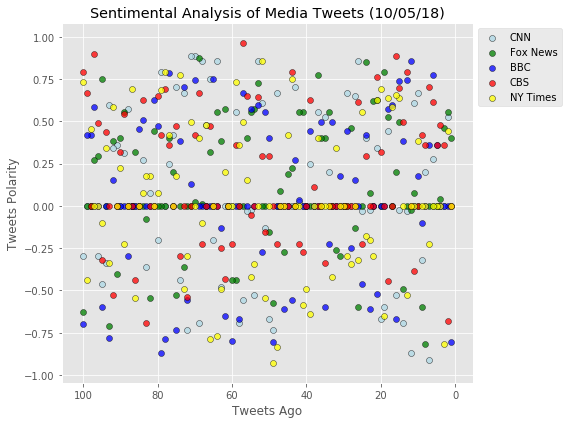

In [6]:
#create filter by city types
cnn = summary.loc[(summary["account"] == "CNN")]
foxnews = summary.loc[(summary["account"] == "FoxNews")]
bbc = summary.loc[(summary["account"] == "BBC")]
cbs = summary.loc[(summary["account"] == "CBS")]
nytimes = summary.loc[(summary["account"] == "nytimes")]



plt.scatter(cnn["Tweets Ago"], cnn["Compound"], marker="o", 
                          facecolors="lightblue", edgecolors="black", alpha=0.75, label='CNN')

plt.scatter(foxnews["Tweets Ago"], foxnews["Compound"], marker="o", 
                          facecolors="green", edgecolors="black", alpha=0.75,  label='Fox News')

plt.scatter(bbc["Tweets Ago"], bbc["Compound"], marker="o", 
                          facecolors="blue", edgecolors="black", alpha=0.75, label='BBC')

plt.scatter(cbs["Tweets Ago"], cbs["Compound"], marker="o", 
                          facecolors="red", edgecolors="black", alpha=0.75,   label='CBS' )

plt.scatter(nytimes["Tweets Ago"], nytimes["Compound"], marker="o", 
                          facecolors="yellow", edgecolors="black", alpha=0.75,  label='NY Times')

plt.gca().invert_xaxis()
plt.rcParams["figure.figsize"] = [8,6]
#lgnd = plt.legend(loc="outside left", scatterpoints=1, fontsize=8, title="City Types",)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

now = datetime.now()
now = now.strftime("%m/%d/%y")


# Incorporate the other graph properties
plt.xlabel("Tweets Ago")
plt.ylabel("Tweets Polarity")
plt.title(f"Sentimental Analysis of Media Tweets ({now})")
plt.tight_layout()

# Save Figure
plt.savefig("Sentimental Scatter plot.png")



In [8]:
compound = summary.groupby(["account"]).mean()
compound = compound["Compound"]
compound

account
BBC        0.043719
CBS        0.148765
CNN        0.081390
FoxNews    0.106135
nytimes    0.040359
Name: Compound, dtype: float64

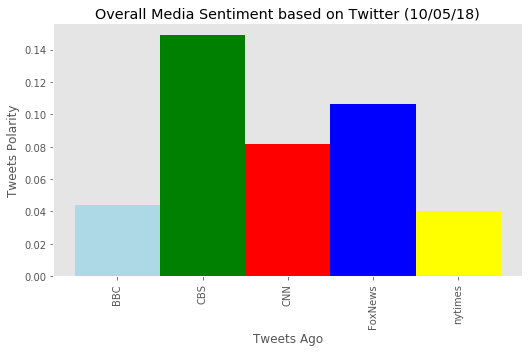

In [9]:

compound.plot(kind="bar", color=['lightblue', 'green', 'red', 'blue', 'yellow'], figsize = (7.5,5), width=1.0, grid=False)

# Set textual properties
plt.xlabel("Tweets Ago")
plt.ylabel("Tweets Polarity")
plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.tight_layout()

# Save Figure
plt.savefig('Sentimental Bar plot.png')



# Sentiment Analysis

* The overall sentiment score can change from positive to negative based on the time of the day and current events on that specific day.
* Based on the sentiment analysis, most of the tweets from these news outlets appear to be neutral. 
* Within this past week, the average compound scores from these news outlets are within the ranage of -.20 to +.20. The compound scores may indicate that they want to present the news stories in a neutral way.
